Dorian Gailhard - dorian.gailhard@telecom-paris.fr

# Géométrie et espaces de formes - TP 1


## 1. Noyaux reproduisants et interpolation


### Noyaux reproduisants

Soit $H$ un espace de Hilbert de fonctions $f:{\mathbb R}^d\rightarrow{\mathbb R}$. $H$ est un espace à noyau reproduisant s'il existe une fonction
$K_H:{\mathbb R}^d\times{\mathbb R}^d\rightarrow{\mathbb R}$ telle que $\forall x\in{\mathbb R}^d, K_H(\cdot,x)\in H$, et 

$$ \forall f\in H,\quad\forall x\in{\mathbb R}^d,\quad f(x)=\langle{K_H(\cdot,x)},f\rangle_H.$$

$K_H$ est alors défini de façon unique et est appelé noyau reproduisant de $H$. On peut remarquer que l'on a la propriété suivante (propriété reproduisante) :

$$\forall x,y\in{\mathbb R}^d,\quad \langle K_H(\cdot,x),K_H(\cdot,y)\rangle_H=K_H(x,y).$$

Inversement, il est possible, à partir d'une fonction $K:{\mathbb R}^d\times{\mathbb R}^d\rightarrow{\mathbb R}$ de type positif, de construire l'unique espace de Hilbert $H$ de fonctions tel que $K_H=K$.

### Un premier exemple : espace de Sobolev $H^1({\mathbb R})$

L'espace de Sobolev $H^1({\mathbb R})$ est l'espace des fonctions de $L^2({\mathbb R})$ dont la dérivée au sens faible appartient aussi à $L^2({\mathbb R})$. En fait tout élément de $H^1({\mathbb R})$ admet un représentant continu et on peut aussi définir $H^1({\mathbb R})$
de façon classique comme l'espace des fonctions $f:{\mathbb R}\rightarrow{\mathbb R}$ continues, de carré intégrable, dérivables presque partout et telles que $\int_x^yf'(t)dt=f(y)-f(x)$ pour tous réels $x,y$. Sur cet espace on définit habituellement le produit scalaire
$$\langle f,g\rangle_{H^1} = \int_{\mathbb R} f(t)g(t)+f'(t)g'(t)\;dt,$$
mais on peut aussi définir plus généralement pour une échelle $\sigma>0$ fixée,
$$\langle f, g\rangle_{H^1_\sigma} = \int_{\mathbb R} f(t)g(t)+\sigma^2f'(t)g'(t)\;dt.$$
On note $H^1_\sigma$ l'espace $H^1({\mathbb R})$ muni de ce produit scalaire. C'est un espace de Hilbert.

__Question 1__ : Montrer que $H^1_\sigma$ est un espace à noyau reproduisant dont le noyau est la fonction $K_\sigma:{\mathbb R}^2\rightarrow{\mathbb R}$ définie par

$$\forall x,y\in{\mathbb R},\quad K_\sigma(x,y)=\frac1{2\sigma}e^{-\frac{|x-y|}\sigma}.$$

On veut vérifier que $f(x) = \langle K_H(.,x), f\rangle_H = \int_{\mathbf{R}} f(t)K_{\sigma}(t,x) + f'(t)K_{\sigma}'(t,x) dt$ où la dérivation est prise par rapport à la première variable pour $K_{\sigma}(.,x)$.

On découpe l'intégrale en deux parties se rejoignant en x :
$$\int_{\mathbf{R}} f(t)K_{\sigma}(t,x) + \sigma^2f'(t)K_{\sigma}'(t,x) dt = $$
$$\int_{-\infty}^xf(t)K_{\sigma}(t,x)dt + \sigma^2\int_{-\infty}^xf'(t)K_{\sigma}'(t,x)dt + \int_x^{+\infty} f(t)K_{\sigma}(t,x)dt + \sigma^2\int_x^{+\infty}f'(t)K_{\sigma}'(t,x)dt$$

En intégrant par parties :
$$\int_{-\infty}^x f(t)K_{\sigma}(t,x) = [\sigma f(t)K_{\sigma}(t,x)]_{-\infty}^x - \sigma\int_{-\infty}^x f'(t)K_{\sigma}(t,x)dt$$

D'autre part,
$$\sigma^2\int_{-\infty}^xf'(t)K_{\sigma}'(t,x)dt = \sigma\int_{-\infty}^xf'(t)K_{\sigma}(t,x)dt$$

En sommant ces deux termes, il reste :
$$[\sigma f(t)K_{\sigma}(t,x)]_{-\infty}^x = \frac{1}{2}f(x)$$ car $f$ admet une limite en $-\infty$ (elle appartient à $H^1$ donc $f' \in L^2(\mathbf{R})$) et $K_{\sigma}(.,x)$ tend vers 0 en $-\infty$.

On fait de même avec la deuxième partie de l'intégrale et on obtient bien $f(x)$.

__Question 2__ : Vérifier numériquement la propriété du noyau : choisir par exemple $\sigma=2$, une fonction $f\in H^1_\sigma$ quelconque (par exemple $f(x)=e^{-x^2}$), un réel $x\in{\mathbb R}$ quelconque, puis calculer une valeur approchée de $\langle f, {K_\sigma(\cdot,x)}\rangle_{H^1_\sigma}$ par sommes et différences finies et comparer avec $f(x)$. Vérifier également numériquement la propriété reproduisante.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,8)
from mpl_toolkits.mplot3d import Axes3D
import scipy.integrate

In [2]:
# fonction pour définir le noyau 
def KH1(x,y,sigma=1):
    # ... à compléter
    return np.exp(-np.abs(x-y)/sigma)/(2*sigma)

# fonction pour définir le produit scalaire
def H1ScalProd(f,g,sigma=1):
    # ... à compléter
    # f et g sont deux fonctions python
    # doit renvoyer <f,g>_H1 calculé par sommes et différences finies
    dx = 1e-3
    
    def derivative(fun,x):
        return (fun(x+dx)-fun(x))/dx
    
    return scipy.integrate.quad(lambda t: f(t)*g(t) + sigma**2 * derivative(f,t)*derivative(g,t),-np.inf,np.inf)[0]

# définition des paramètres et fonctions à tester    
# ... à compléter
x = 0
sigma = 2
f = lambda y: np.exp(-y**2)
g = lambda y: KH1(y,x,sigma)

# test : valeur du produit scalaire <f,KH1(.,x)>_H1 et comparaison avec f(x)
# ... à compléter
print("<f,KH1(.,x)>_H1 = %f et f(x) = %f"%(H1ScalProd(f,g,sigma),f(x)))

# vérification de la propriété reproduisante : calcul de <KH1(.,y),KH1(.,x)>_H1 et comparaison avec KH1(x,y)
# ... à compléter
x = 0
y = 1
KHy = lambda t: KH1(t,y,sigma)
KHx = lambda t: KH1(x,t,sigma)

print("<KH1(.,y),KH1(.,x)>_H1 = %f et KH1(x,y) = %f"%(H1ScalProd(KHy,KHx,sigma),KH1(x,y,sigma)))

<f,KH1(.,x)>_H1 = 1.000000 et f(x) = 1.000000
<KH1(.,y),KH1(.,x)>_H1 = 0.151633 et KH1(x,y) = 0.151633


On a bien égalité dans les deux cas (à la précision numérique près).

### Problème d'interpolation scalaire

Le noyau $K_H$ permet de résoudre le problème d'interpolation suivant: 

$$\left\{\begin{array}{l}
\text{Minimiser }\left\|f\right\|_H\text{ pour }f\in H, 
\\ \text{sous les contraintes }f(y_i)=c_i,\quad 1\leq i\leq n
\end{array}\right.
$$

où $y_i\in{\mathbb R}^d, c_i\in$ sont fixés. La solution de ce problème est donnée par
$$f^*(x)=\sum_{j=1}^nK_H(x,y_j)a_j,$$
où les $a_j\in{\mathbb R}$ sont solutions du système linéaire

$$\forall i,\quad 1\leq i\leq n,\quad\sum_{j=1}^nK_H(y_i,y_j)a_j=c_i.$$

Ces équations peuvent s'écrire sous forme condensée: notons ${\bf y}=(y_1,\ldots,y_n)\in{\mathbb R}^{dn}$, $\boldsymbol{a}=(a_1,\ldots,a_n)\in{\mathbb R}^{n}$, ${\bf c}=(c_1,\ldots,c_n)\in{\mathbb R}^{n}$, et $K_H({\bf y},{\bf y})\in\mathcal{M}_{n}({\mathbb R})$ la matrice des $K_H(y_i,y_j)$ pour $1\leq i,j\leq n$. Le système linéaire à résoudre s'écrit alors

$$K_H({\bf y},{\bf y}){\bf a}={\bf c}.$$

De même, l'évaluation de la solution $f^*$ en des points $x_i\in{\mathbb R}^d, 1\leq i\leq p$ s'écrit 

$${\bf f}^*({\bf x})=K_H({\bf x},{\bf y}){\bf a},$$

où ${\bf x}=(x_1,\ldots,x_p)\in{\mathbb R}^{dp}$, ${\bf f}^*({\bf x})=(f^*(x_1),\ldots,f^*(x_p))$, et $K_H({\bf x},{\bf y})\in\mathcal{M}_{p,n}({\mathbb R})$ est la matrice des $K_H(x_i,y_j)$ pour $1\leq i\leq p$, $1\leq j\leq n$.

<br>
<br>

__Question 3__ : Ecrire une fonction
`KernelMatrix(x,y,h)` qui construit
la matrice $K_H({\bf x},{\bf y})$ pour des points ${\bf x}\in{\mathbb R}^{pd}$, ${\bf y}\in{\mathbb R}^{nd}$ quelconques (supposés entrés sous forme de tableaux $p\times d$ et $n\times d$), et un noyau de la forme $K_H(x,y)=h\left(\|x-y\|\right)$, où $h$ est une fonction scalaire. 

In [3]:
def KernelMatrix(x,y,h):
    # ... à compléter
    p = x.shape[0]
    d = x.shape[1]
    n = y.shape[0]
    return np.array([[h(np.linalg.norm(x[i] - y[j])) for j in range(n)] for i in range(p)])


<br>
Voici un exemple de son utilisation :

In [4]:
import numpy as np
x = np.random.rand(10,2)        # 10 points tirés aléatoirement dans [0,1]^2
y = np.random.rand(15,2)        # 15 points tirés aléatoirement dans [0,1]^2
sigma = 1.5                     # échelle du noyau
def gauss(sigma):
    def f(u):
        return np.exp(-u**2/sigma**2)
    return f
Kxy = KernelMatrix(x,y,gauss(sigma))
print(Kxy)

[[0.97995363 0.68162658 0.94519497 0.89145388 0.99140463 0.65279907
  0.6511072  0.95055304 0.84036529 0.7102159  0.5054891  0.976284
  0.61038669 0.54117493 0.96919519]
 [0.96187117 0.89987165 0.93007084 0.99744588 0.93340488 0.77555491
  0.90044554 0.91792485 0.94822573 0.81630327 0.77259764 0.91384119
  0.84291765 0.79618787 0.97558634]
 [0.92564796 0.87292111 0.9823816  0.87671215 0.92252609 0.92263722
  0.78688923 0.97792388 0.98082242 0.95470054 0.70924278 0.95237372
  0.83349613 0.76046896 0.91070056]
 [0.96705679 0.80223656 0.89995248 0.98750632 0.94386147 0.6642073
  0.82183332 0.89173915 0.87656379 0.71315467 0.66459859 0.90672911
  0.73257789 0.68431986 0.98305402]
 [0.65617796 0.96078556 0.66893059 0.78918111 0.60673561 0.78751339
  0.97538364 0.64479301 0.82791164 0.78176099 0.99766896 0.60558207
  0.97249288 0.99160934 0.68010737]
 [0.75544706 0.88485156 0.85642006 0.73793876 0.74443115 0.99857184
  0.76723691 0.84618801 0.92919339 0.99739757 0.76826995 0.79383381
  0.884

<br>
<br>

__Question 4__ : Ecrire une fonction
`Interp(x,y,c,h)`
qui résout le problème d'interpolation $f(y_i)=c_i$, $1\leq i\leq n$ et renvoie l'évaluation de la solution aux points $x_i$, $1\leq i\leq p$`

In [5]:
def Interp(x,y,c,h):
    # ... à compléter
    a = np.linalg.solve(KernelMatrix(y,y,h),c)
    return KernelMatrix(x,y,h)@a

<br>

__Question 5__ : Tester la fonction `Interp` tout d'abord avec $d=1$: 

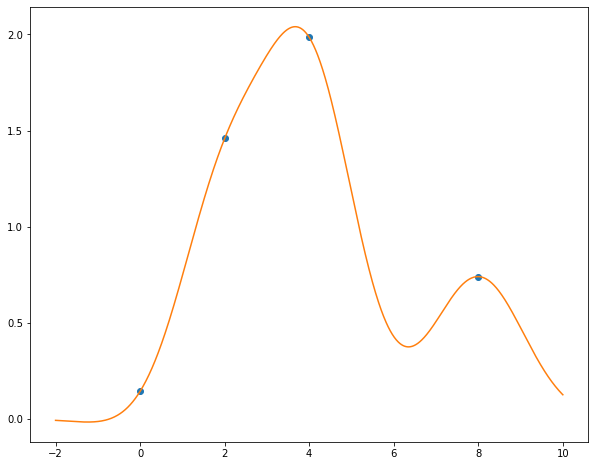

In [6]:
y = np.array([0,2,4,8])[:,None]         # vecteur [0,2,4,8] sous forme de tableau 4x1
c = np.random.randn(4,1)                # valeurs tirées aléatoirement
x = np.linspace(-2,10,1000)[:,None]     # points xj où évaluer l'interpolation
fx = Interp(x,y,c,gauss(sigma))         # calcul de l'interpolation

plt.plot(y,c,'o')                       # affichage
plt.plot(x,fx);

<br>
<br>

Tester ensuite le même problème en changeant l'échelle du noyau : on prendra ainsi $h(u)=e^{-u^2/\sigma^2}$ pour $\sigma\in\{0.2,2,4,10\}$. Afficher sur le même graphique les différentes solutions. Tester également l'interpolation avec des noyaux de Cauchy : $h(u)=\frac1{1+u^2/\sigma^2}$.

In [7]:
c = np.random.randn(4,1)                # valeurs tirées aléatoirement

y = np.array([0,2,4,8])[:,None]         # vecteur [0,2,4,8] sous forme de tableau 4x1
x = np.linspace(-2,10,1000)[:,None]     # points xj où évaluer l'interpolation

sigmas = [0.2,2,4,10]

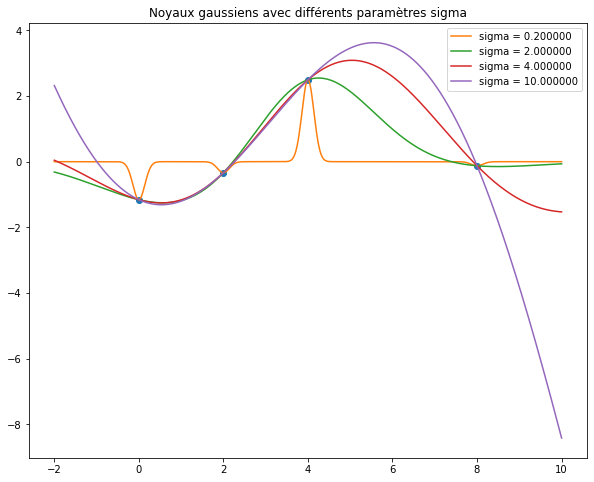

In [8]:
plt.plot(y,c,'o')                       # affichage

for sigma in sigmas:
    fx = Interp(x,y,c,lambda u: np.exp(-u**2/sigma**2))         # calcul de l'interpolation

    plt.plot(x,fx,label="sigma = %f"%sigma);

plt.legend()
plt.title("Noyaux gaussiens avec différents paramètres sigma")
plt.show()

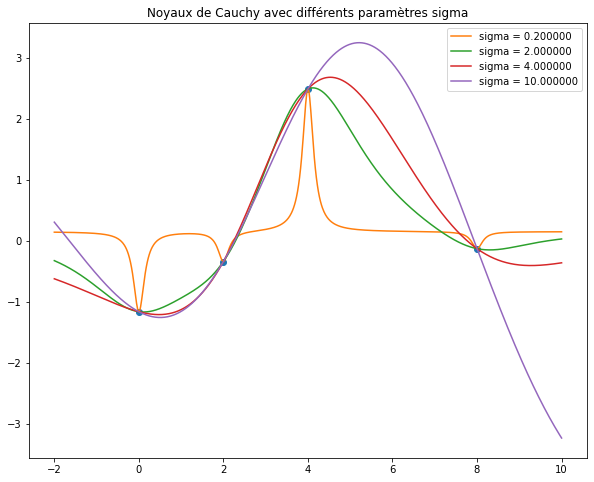

In [9]:
plt.plot(y,c,'o')                       # affichage

for sigma in sigmas:
    fx = Interp(x,y,c,lambda u: np.exp(1/(1 + u**2/sigma**2)))         # calcul de l'interpolation

    plt.plot(x,fx,label="sigma = %f"%sigma);

plt.legend()
plt.title("Noyaux de Cauchy avec différents paramètres sigma")
plt.show()

<br>
<br>

__Question 6__ : Effectuer l'interpolation avec un noyau $K_\sigma$ de la première partie, et vérifier numériquement 
que la norme dans $H^1_\sigma$ de la solution est toujours inférieure à la norme d'autres fonctions de $H^1_\sigma$ passant par les points (par exemple les solutions du problème d'interpolation avec d'autres noyaux).

In [10]:
sigma = 2

def KH1(x,y):
    # ... à compléter
    return (np.exp(-np.abs(x-y)/sigma)/(2*sigma))[0]

def KernelMatrixExo1(x,y):
    # ... à compléter
    p = x.shape[0]
    d = x.shape[1]
    n = y.shape[0]
    return np.array([[KH1(x[i],y[j]) for j in range(n)] for i in range(p)])

In [11]:
def InterpKernel(x,y,c,K): #prend le kernel et plus la fonction h en paramètre
    # ... à compléter
    a = np.linalg.solve(K(y,y),c)
    return K(x,y)@a

In [12]:
y = np.array([0,2,4,8])[:,None]         # vecteur [0,2,4,8] sous forme de tableau 4x1

c = np.random.randn(4,1)                # valeurs tirées aléatoirement
x = np.linspace(-2,10,1000)[:,None]     # points xj où évaluer l'interpolation

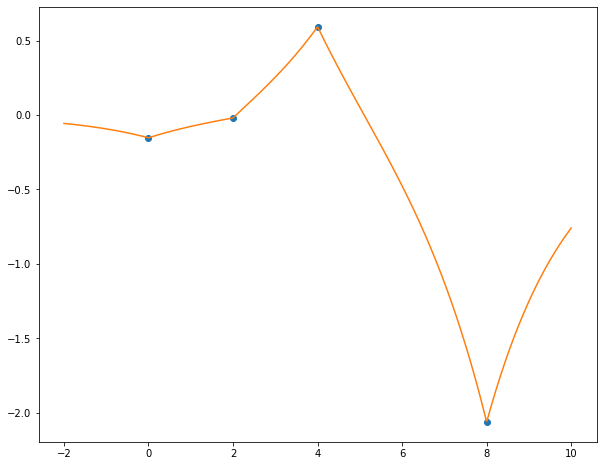

In [13]:
fx = InterpKernel(x,y,c,KernelMatrixExo1)         # calcul de l'interpolation

plt.plot(y,c,'o')                       # affichage
plt.plot(x,fx);

In [14]:
f_integrate = lambda t : InterpKernel(np.array([[t]]),y,c,KernelMatrixExo1)[0] #Interp renvoie la fonction solution évaluée en des points et non pas une fonction python

print("||f*||_H = %f"%(H1ScalProd(f_integrate,f_integrate,sigma=1)))

||f*||_H = 10.999406


<ipython-input-2-68afc3fb240d>:16: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return scipy.integrate.quad(lambda t: f(t)*g(t) + sigma**2 * derivative(f,t)*derivative(g,t),-np.inf,np.inf)[0]


In [15]:
f_integrate = lambda t : Interp(np.array([[t]]),y,c,lambda u: np.exp(1/(1 + u**2/sigma**2)))[0] #Même chose avec un noyau de Cauchy

print("La norme de l'interpolation avec un noyau de Cauchy est ||f*_cauchy||_H = %f"%(H1ScalProd(f_integrate,f_integrate,sigma=1)))

La norme de l'interpolation avec un noyau de Cauchy est ||f*_cauchy||_H = 12.774400


<ipython-input-2-68afc3fb240d>:16: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return scipy.integrate.quad(lambda t: f(t)*g(t) + sigma**2 * derivative(f,t)*derivative(g,t),-np.inf,np.inf)[0]


La norme est bien plus grande pour la seconde fonction, bien que l'intégration numérique soit difficile.
Cela est resté vrai en relançant plusieurs fois avec des points à interpoler différents.

<br>
<br>

__Question 7__ : Tester à présent l'interpolation dans le cas $d=2$: choisir par exemple $10$ points $y_i$ dans $[0,1]^2$ et des réels $c_i$ tirés aléatoirement, puis évaluer sur une grille uniforme de $100*100$ points que l'on construira avec la commande suivante : `X1, X2 = np.meshgrid(t,t)`

In [16]:
def InterpGrid(X1,X2,y,c,h) :
    # ... à compléter
    # doit renvoyer l'évaluation de l'interpolant à noyau sur les points de la grille X1,X2
    a = np.linalg.solve(KernelMatrix(y,y,h),c)
    return (KernelMatrix(np.dstack((X1, X2)).reshape(-1, 2),y,h)@a).reshape(X1.shape)

n = 10
d = 2
sigma = .25
y = np.random.rand(n,d)    # 10 points tirés aléatoirement dans [0,1]^2
c = np.random.randn(n,1)   # 10 valeurs aléatoires
t = np.linspace(0,1,100)
X1, X2 = np.meshgrid(t,t)  # grille uniforme de 50*50 points
Z = InterpGrid(X1,X2,y,c,gauss(sigma))

<br>

Si les valeurs interpolées sont dans le tableau `fX` de taille $100*100$, on affichera ensuite la solution avec

<ipython-input-17-71762ac3e8c7>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes(projection='3d')


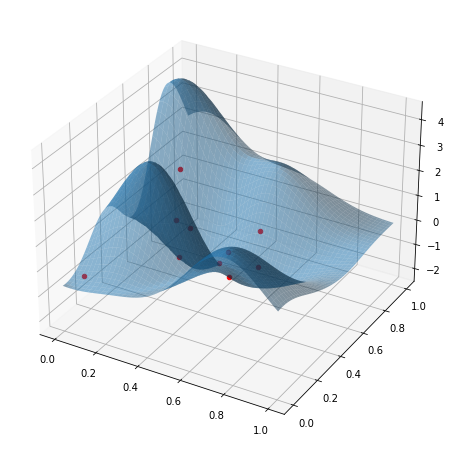

In [17]:
fig = plt.figure()
plt.title("interpolation de fonction 2D")
ax = plt.axes(projection='3d')
ax.plot_surface(X1,X2,Z, alpha=0.5)
ax.scatter3D(y[:,0],y[:,1],c,c='r',depthshade=False)

<br>
<br>

### Interpolation relaxée

Dans certains cas, les contraintes d'interpolation peuvent s'avérer trop fortes pour la norme de Hilbert utilisée (typiquement lorsque le paramètre d'échelle $\sigma$ est grand par rapport aux positions des points d'interpolation). Numériquement ceci se traduit par une matrice d'interpolation très mal conditionnée. D'autre part les données d'observation peuvent être bruitées, auquel cas une fonction passant exactement par les contraintes n'est plus désirable. Une solution consiste alors à écrire un problème d'interpolation relaxé (_smoothing spline interpolation_) : 

$$\text{Minimiser }\quad\lambda\left\|f\right\|_H^2+\sum_{i=1}^n(f(y_i)-c_i)^2,$$
où $\lambda>0$ est un paramètre à fixer. 

<br>

__Question 8__ : Montrer que la solution de l'interpolation inexacte s'obtient en rajoutant $\lambda$ aux coefficients diagonaux de la matrice du système linéaire.

Le théorème de représentation nous donne que $f^*$ (la fonction f minimisant l'objectif) peut s'écrire sous la forme :
$$f^*(x) = \sum_{i=1}^n a_iK_H(.,y_i)$$

L'objectif se réécrit alors :
$$min_{(a_i)} \lambda \langle \sum_{i=1}^n a_iK_H(.,y_i), \sum_{i=1}^n a_iK_H(.,y_i) \rangle_H + \sum_{j=1}^n(\sum_{i=1}^n a_iK_H(y_j,y_i) - c_j)^2 = \lambda \sum_{i=1}^n\sum_{j=0}^n a_ia_jK_H(y_i,y_j) + \sum_{j=1}^n(\sum_{i=1}^n a_iK_H(y_j,y_i) - c_j)^2$$

On minimise en appliquant le gradient par rapport aux $(a_i)$ et en l'égalisant à 0:
$$\forall i, 2\lambda \sum_{j=1}^n a_jK_H(y_i,y_j) + 2\sum_{j=1}^nK_H(y_i,y_j)(\sum_{k=1}^n a_kK_H(y_j,y_k) - c_j) = 0$$

d'où $$\forall i, \lambda \sum_{j=1}^n a_jK_H(y_i,y_j) + \sum_{j=1}^nK_H(y_i,y_j)\sum_{k=1}^n a_kK_H(y_j,y_k) = \sum_{j=1}^nK_H(y_i,y_j)c_j$$

qui se réécrit
$$K_H(\bf y, \bf y)(\lambda I_n + K_H(\bf y, \bf y))\bf a = K_H(\bf y, \bf y)\bf a$$

et $K_H$ est défini positif donc $K_H(\bf y, \bf y)$ est inversible et
$$(K_H({\bf y},{\bf y}) + \lambda I_n){\bf a}={\bf c}.$$

<br>

Modifier les fonctions précédentes pour prendre en compte ce nouveau modèle, et le tester sur les exemples précédents et sur l'exemple suivant :
```
y = np.linspace(0,1,30)[:,None]
c = np.cos(6*y) + .05*np.random.randn(30,1)
```
avec $h(u)=e^{-u^2/\sigma^2}$ et les jeux de paramètres suivants : $\sigma\in\{0.1,0.25\}, \lambda\in\{0,0.1\}$.

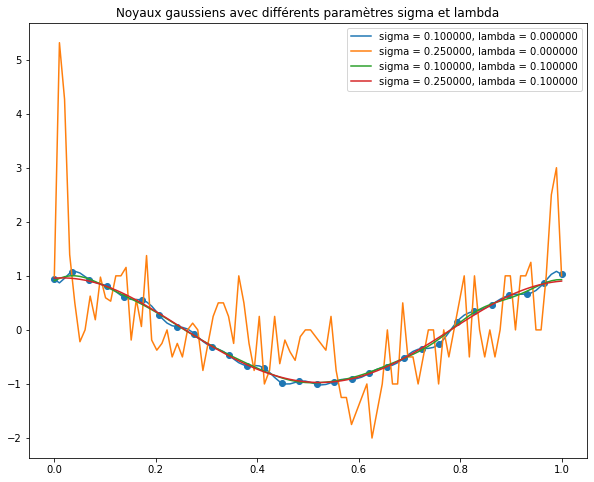

In [18]:
# redéfinition de Interp pour inclure le paramètre lambda
def Interp(x,y,c,h,l=0):
    # ... à compléter
    a = np.linalg.solve(KernelMatrix(y,y,h) + np.eye(y.shape[0])*l,c)
    return KernelMatrix(x,y,h)@a

# tests pour différentes valeurs de sigma et de lambda
n = 30
x = np.linspace(0,1,100)[:,None]
y = np.linspace(0,1,n)[:,None]
c = np.cos(6*y) + .05*np.random.randn(n,1)
# ... à compléter
sigmas = [0.1,0.25]
lambdas = [0,0.1]

for l in lambdas:
    for sigma in sigmas:
        fx = Interp(x,y,c,lambda u: np.exp(-u**2/sigma**2),l)         # calcul de l'interpolation
        plt.plot(x,fx,label="sigma = %f, lambda = %f"%(sigma,l));

plt.scatter(y,c)
plt.legend()
plt.title("Noyaux gaussiens avec différents paramètres sigma et lambda")
plt.show()

<br>
<br>

### Problème d'interpolation vectorielle

On suppose à présent que $V$ est un espace de Hilbert de fonctions à valeurs vectorielles $v:{\mathbb R}^d\rightarrow{\mathbb R}^m$. 
S'il existe, le noyau reproduisant $K_V$ de l'espace $V$ est alors une application ${\mathbb R}^d\times{\mathbb R}^d\rightarrow\mathcal{M}_m({\mathbb R})$, définie par la relation: 

$$ \forall v\in V,\forall x\in{\mathbb R}^d,\forall \alpha\in{\mathbb R}^m,\quad\langle{v(x)},{\alpha}\rangle=\langle{K_V(\cdot,x)\alpha},v\rangle_V.$$

La propriété reproduisante s'écrit alors

$$ \forall x,y\in{\mathbb R}^d,\forall \alpha,\beta\in{\mathbb R}^m,\quad\left\langle {K_V(\cdot,x)\alpha},{K_V(\cdot,y)\beta}\right\rangle_V=\langle{K_V(x,y)\beta},{\alpha}\rangle.$$

On considère le problème exact d'interpolation vectorielle suivant: 

$$\text{Minimiser }\left\| v\right\|_V\text{ pour $v\in V$, sous les contraintes }v(y_i)=\gamma_i,$$

où $y_i\in{\mathbb R}^d, \gamma_i\in{\mathbb R}^m$ sont fixés, $1\leq i\leq n$. On considère aussi le problème relaxé associé :

$$\text{Minimiser }\gamma\|v\|_V^2+\sum_{i=1}^n\|v(y_i)-\gamma_i\|^2,$$

__Question 9__ : Montrer que pour un noyau de la forme $K_V(x,y)=h(\|x-y\|)I_m$, les problèmes d'interpolation vectoriels exacts et relaxés sont équivalents à $m$ problèmes d'interpolation scalaires
avec le noyau scalaire $K_H(x,y)=h(\|x-y\|)$ (on supposera que ce noyau $K_H$ est bien le noyau reproduisant d'un espace de Hilbert $H$ de fonctions scalaires).

$v$ peut s'écrire comme $\sum_{i=0}^m v_i$ où $v_i$ est la fonction qui ne conserve que la i-ème coordonnées de $v$ et complète avec des zéros le reste du vecteur.

Comme le noyau est diagonal (de la forme $K_V(x,y)=h(\|x-y\|)I_m$), les $v_i$ forment une famille orthogonale (on peut le voir en décomposant la fonction optimale sur la base des $K_H(.,y_i)$ avec le théorème de représentation puis en utilisant la propriété reproduisante avec $\alpha$ et $\beta$ qui sont des vecteurs avec un 1 sur le i ou j souhaité et des zeros partout ailleurs) et la norme se réécrit :
$$\left\| v\right\|_V^2 = \sum_{i=0}^m \left\| v_i\right\|_V^2 = \sum_{i=0}^m \left\| v_i\right\|_H^2$$ (la fonction $v_i$ pour la norme dans H est une fonction scalaire qui vaut la i-ème coordonnée de $v$ là où celle dans V est toujours le vecteur complété avec des zéros, j'abuse de cette notation car on peut confondre les deux).

L'objectif se réécrit alors :
$$\sum_{j=0}^m [\gamma\left\| v_j\right\|_H^2 + \sum_{i=1}^n(v_j(y_i)-\gamma_{ij})^2]$$
où $\gamma_{ij}$ est la j-ième coordonnée du i-ème vecteur $\gamma$.

C'est bien la somme de m problèmes d'interpolations scalaires avec le noyau $K_H$.
On peut faire la même chose pour le problème d'interpolation exacte.

<br>

Si besoin, modifier la fonction `Interp` pour qu'elle puisse aussi résoudre les problèmes d'interpolation vectorielle.

In [19]:
def Interp(x,y,gamma,h,l=0):
    # ... à compléter
    res = np.zeros((x.shape[0],gamma.shape[1]))
    
    for i in range(gamma.shape[1]): #On fait comme avant mais coordonnée par coordonnée
        a = np.linalg.solve(KernelMatrix(y,y,h) + np.eye(y.shape[0])*l,gamma[:,i])
        res[:,i] = KernelMatrix(x,y,h)@a
    return res

<br>

__Question 10__ : Tester la fonction `Interp` avec $d=m=2$: générer des points $y_i$ dans $[0,1]^2$ (commencer avec $n=3$), des vecteurs $\gamma_i$ avec la commande `gamma = 0.05*np.random.randn(n,d)` puis évaluer sur une grille uniforme de taille 20*20. Afficher le champ de vecteurs obtenu avec la fonction `quiver` de Matplotlib.

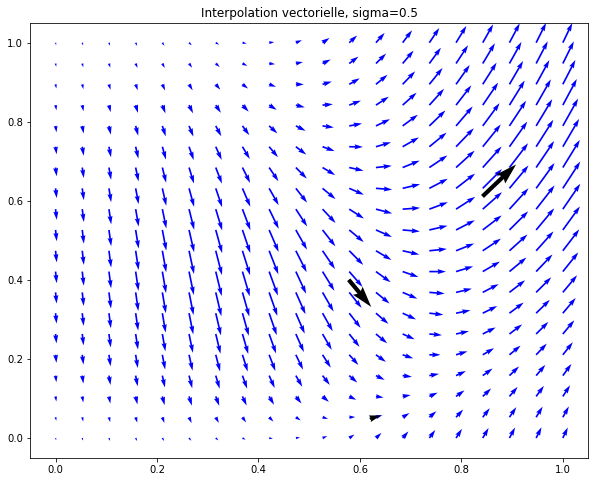

In [20]:
def InterpGrid2D(X1,X2,y,gamma,h,l=0) :
    # ... à compléter
    # modification de InterpGrid devant renvoyer un interpolant vectoriel et non scalaire
    res = np.zeros((X1.shape[0],X1.shape[1],gamma.shape[1]))

    for i in range(gamma.shape[1]): #On fait comme avant mais coordonnée par coordonnée
        a = np.linalg.solve(KernelMatrix(y,y,h) + np.eye(y.shape[0])*l,gamma[:,i])
        res[:,:,i] = (KernelMatrix(np.dstack((X1, X2)).reshape(-1, 2),y,h)@a).reshape(X1.shape)
    return (res[:,:,0],res[:,:,1])

n = 3
d = 2
m = 2
sigma = .5
y = np.random.rand(n,d)
gamma = 0.05*np.random.randn(n,m)
t = np.linspace(0,1,20)
X1, X2 = np.meshgrid(t,t)
V1, V2 = InterpGrid2D(X1,X2,y,gamma,gauss(sigma))
plt.title("Interpolation vectorielle, sigma="+str(sigma))
plt.quiver(X1,X2,V1,V2,color='b')
plt.quiver(y[:,0],y[:,1],gamma[:,0],gamma[:,1]);


<br>
<br>

## Appariement de points labellisés

### Appariement linéaire

Le problème d'interpolation vectorielle précédent, pour $d=m$, peut être vu comme un problème d'appariement de points. Pour la version "exacte", ceci s'écrit :
$$ \left\{\begin{array}{l} \phi(y_i)=z_i\qquad \forall i\in\{1,\ldots,n\},
\\\phi(x)=x+v(x)
\\ \|v\|_V \text{ minimal}.\end{array}\right.$$

On se ramène simplement au problème précédent en posant $\gamma_i=z_i-y_i$.

<br>

__Question 11__ : On se place dans le plan ($d=m=2$). Reprendre l'exemple de la question précédente, en affichant cette fois dans un même graphique les points $y_i$ et $z_i$ et visualiser la solution $\phi$ en calculant et en affichant le déplacement d'une grille de points.

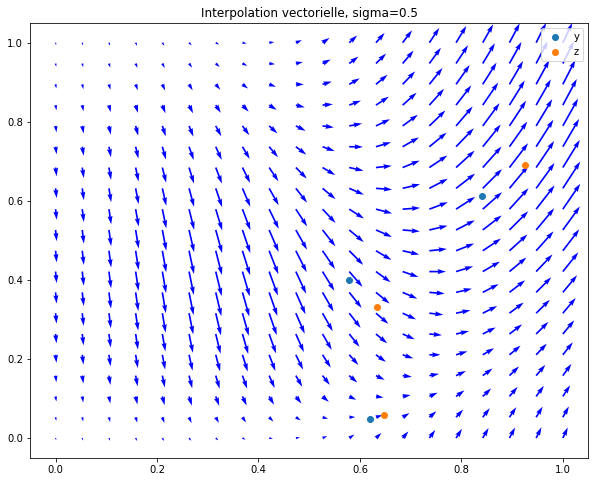

In [21]:
def InterpGrid2D(X1,X2,y,gamma,h,l=0) :
    # ... à compléter
    # modification de InterpGrid devant renvoyer un interpolant vectoriel et non scalaire
    res = np.zeros((X1.shape[0],X1.shape[1],gamma.shape[1]))

    for i in range(gamma.shape[1]): #On fait comme avant mais coordonnée par coordonnée
        a = np.linalg.solve(KernelMatrix(y,y,h) + np.eye(y.shape[0])*l,gamma[:,i])
        res[:,:,i] = (KernelMatrix(np.dstack((X1, X2)).reshape(-1, 2),y,h)@a).reshape(X1.shape)
    return (res[:,:,0],res[:,:,1])

z = gamma + y
X1, X2 = np.meshgrid(t,t)
V1, V2 = InterpGrid2D(X1,X2,y,gamma,gauss(sigma))
plt.title("Interpolation vectorielle, sigma="+str(sigma))
plt.quiver(X1,X2,V1,V2,color='b')
plt.scatter(y[:,0],y[:,1],label="y")
plt.scatter(z[:,0],z[:,1],label="z")
plt.legend()

<br>

__Question 12__ : Charger le fichiers `hand1.mat` et `hand2.mat` avec les commandes :

In [22]:
import scipy.io
C1 = scipy.io.loadmat('hand1.mat')['C1']
C2 = scipy.io.loadmat('hand2.mat')['C2']

Les tableaux `C1` et `C2` 
contiennent les coordonnées de deux contours de mains. Avec le code suivant, sélectionner des points de référence (extrémités des doigts, etc.) pour chacun :

In [23]:
%matplotlib tk
plt.rcParams["figure.figsize"] = (10,8)
plt.figure()
plt.plot(C1[:,0],C1[:,1])
plt.title("Sélectionner les points y_i puis appuyer sur Entrée")
y = np.array(plt.ginput(0))
plt.plot(y[:,0],y[:,1],'o')
plt.show()
print("y=",y)

plt.figure()
plt.plot(C2[:,0],C2[:,1])
plt.title("Sélectionner les points z_i puis appuyer sur Entrée")
z = np.array(plt.ginput(0))
plt.plot(z[:,0],z[:,1],'o')
plt.show()
print("z=",z)

y= [[0.14721567 0.32808061]
 [0.30249186 0.14547521]
 [0.45553386 0.08413121]
 [0.68342121 0.16259447]
 [0.92694789 0.63480061]]
z= [[0.7040459  0.43641741]
 [0.4533072  0.08368304]
 [0.32162428 0.0419308 ]
 [0.23323438 0.08944196]
 [0.08170884 0.20893973]]


<br>

Réaliser l'appariement des deux ensembles de points puis afficher sur un même graphique la courbe $C_2$ et ses points de référence, la courbe transformée $\phi(C_1)$ et le déplacement d'une grille de points.

[]

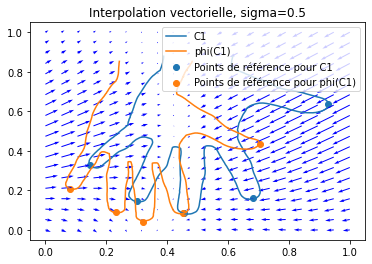

In [24]:
%matplotlib inline
plt.plot(C1[:,0],C1[:,1], label="C1")
plt.plot(C2[:,0],C2[:,1], label="phi(C1)")
plt.scatter(y[:,0],y[:,1], label="Points de référence pour C1")
plt.scatter(z[:,0],z[:,1], label="Points de référence pour phi(C1)")

gamma = np.array(z) - np.array(y)
X1, X2 = np.meshgrid(t,t)
V1, V2 = InterpGrid2D(X1,X2,y,gamma,gauss(sigma))
plt.title("Interpolation vectorielle, sigma="+str(sigma))
plt.quiver(X1,X2,V1,V2,color='b')
plt.legend()
plt.plot()

<br>
<br>

## Ajout des déplacements affines et modèle Thin Plate Splines

Il est possible d'ajouter au modèle les déplacements affines. Le problème d'appariement exact devient alors:

$$ \left\{\begin{array}{l} \phi(y_i)=z_i\qquad \forall i\in\{1,\ldots,n\},
\\\phi(x)=x+v(x)+Bx+c
\\ \|v\|_V \text{ minimal}.\end{array}\right.$$

où $B$ est une matrice carrée de taille $d$ et $c$ un vecteur. On peut montrer que le champ de vecteur optimal s'écrit toujours comme une combinaison linéaire des noyaux $K_V(\cdot,y_i)$.

<br>

__Question 13__ : Trouver le système linéaire à résoudre pour obtenir les coefficients des vecteurs $\alpha_i$, $c$, et de la matrice $B$ (_indication : considérer les conditions de Karush-Kuhn-Tucker à l'optimum pour obtenir les équations manquantes_), puis implémenter cet appariement. Reprendre l'exemple des contours de mains avec ce nouveau modèle. 

<br>

__Question 14__ : Tester à présent ce nouveau modèle avec le noyau $h(r)=r^2\log(r)$. Ce noyau n'est pas de type positif mais semi-positif, et n'est utilisable qu'en incluant les transformations affines. C'est le modèle de spline "plaque mince" (TPS: Thin Plate Splines).